# Clustering the Olivetti Faces

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Classifying-Olivetti-Faces"):
    raise ValueError("Please change working directory to 'path/Clustering-and-Classifying-Olivetti-Faces' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Classifying-Olivetti-Faces


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Olivetti Faces Dataset

In [5]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
list(olivetti)

['data', 'images', 'target', 'DESCR']

In [6]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [7]:
X_olivetti = olivetti.data
y_olivetti = olivetti.target

In [8]:
x_square_len = int(np.sqrt(X_olivetti.shape[1]))

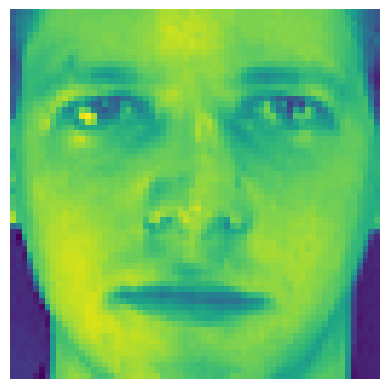

In [9]:
plt.imshow(X_olivetti[0].reshape(x_square_len, x_square_len))
plt.axis("off")
plt.show()

## Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_olivetti, y_olivetti, test_size=0.3, stratify=y_olivetti, random_state=42)

In [11]:
(pd.Series(y_train).value_counts() / len(y_train)).head()

15    0.025
3     0.025
22    0.025
31    0.025
38    0.025
Name: count, dtype: float64

In [12]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=1/3, stratify=y_valid_test)

In [1]:
(pd.Series(y_valid).value_counts() / len(y_train)).head()

NameError: name 'pd' is not defined

## Simple K-means

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, n_init=10, random_state=42)

kmeans.fit(X_train)

KMeans(n_clusters=40, n_init=10, random_state=42)

Cluster 0


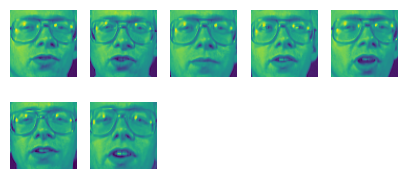

Cluster 1


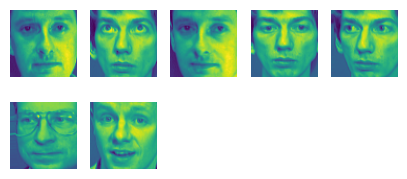

Cluster 2


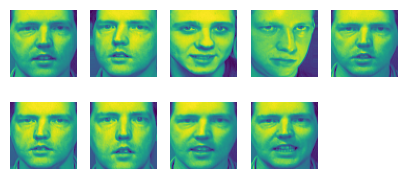

Cluster 3


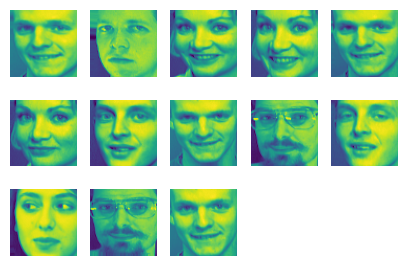

Cluster 4


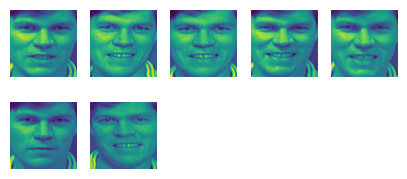

In [15]:
for cluster_id in np.unique(kmeans.labels_)[:5]:
    faces = X_train[kmeans.labels_==cluster_id]
    n_rows = (len(faces) - 1) // 5 + 1
    print(f"Cluster {cluster_id}")
    plt.figure(figsize=(5, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 5, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()

## N_clusters analysis

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

264

In [50]:
kmeans_per_k = []
for k in range(10, 200, 2):
    kmeans = KMeans(k, n_init=10, random_state=42)
    kmeans.fit(X_train_reduced)
    kmeans_per_k.append(kmeans)

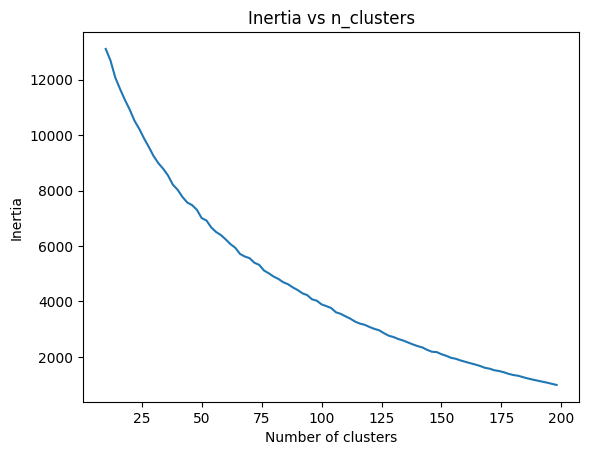

In [ ]:
inertias = [kmeans.inertia_ for kmeans in kmeans_per_k]
ks = range(10, 200, 2)

plt.plot(ks, inertias)
plt.title("Inertia vs n_clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

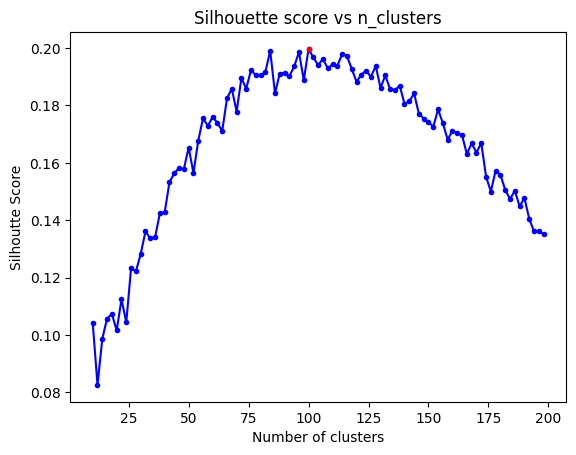

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = np.array([silhouette_score(X_train_reduced, kmeans.labels_) for kmeans in kmeans_per_k])
max_silhouette_idx = np.argmax(silhouette_scores)
plt.plot(ks, silhouette_scores, "bo-", markersize=3)
plt.plot([ks[max_silhouette_idx]], [silhouette_scores[max_silhouette_idx]], "ro", markersize=3)
plt.title("Silhouette score vs n_clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Score")
plt.show()

In [54]:
ks[max_silhouette_idx]

100

## Train k-means with optimal n_clusters

In [56]:
kmeans = KMeans(n_clusters=100, n_init=10, random_state=42)

X_train_pred = kmeans.fit_predict(X_train)

Cluster 0


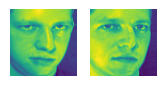

Cluster 1


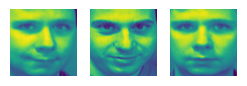

Cluster 2


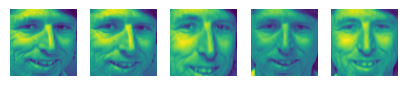

Cluster 3


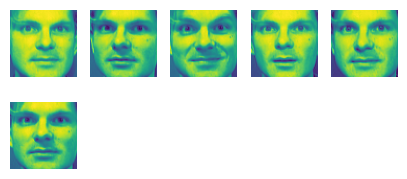

Cluster 4


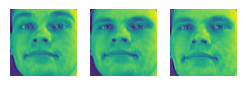

In [57]:
for cluster_id in np.unique(kmeans.labels_)[:5]:
    faces = X_train[kmeans.labels_==cluster_id]
    n_rows = (len(faces) - 1) // 5 + 1
    print(f"Cluster {cluster_id}")
    plt.figure(figsize=(5, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 5, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()